In [ ]:
import os
import glob
import tensorflow as tf
import random
from PIL import Image
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
model = load_model('/content/drive/MyDrive/CNN_model/chest_Xray.keras')

In [53]:
def pick_random_file(folder1, folder2):
    files1 = os.listdir(folder1)
    files2 = os.listdir(folder2)

    # Combine both file lists
    all_files = [(folder1, f) for f in files1] + [(folder2, f) for f in files2]

    # Pick a random file from the combined list
    chosen_folder, chosen_file = random.choice(all_files)

    chosen_file_path = os.path.join(chosen_folder, chosen_file)

    if 'NORMAL' in chosen_folder:
      image_label = 'Normal'
    else:
      image_label = 'Pneumonia'

    return chosen_file_path, image_label




In [54]:
def predict(image_path):

  image = Image.open(image_path).convert('RGB')
  image_resized = image.resize((224,224))

  # Convert image to array, normalize, and change dimension
  image_array = np.array(image_resized)
  x = image_array / 255.0
  x = np.expand_dims(x, axis=0)

  prediction = model.predict(x)

  if prediction >= 0.5:
    print('Model Prediction: Pneumonia')
    plt.imshow(image)
  else:
    print('Model Prediction: Normal')
    plt.imshow(image)

In [57]:
normal = '/content/drive/MyDrive/test/NORMAL'
pneu = '/content/drive/MyDrive/test/PNEUMONIA'

xray = pick_random_file(normal, pneu)

xray

('/content/drive/MyDrive/test/PNEUMONIA/person118_bacteria_559.jpeg',
 'Pneumonia')

Actual Diagnosis: Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Model Prediction: Pneumonia


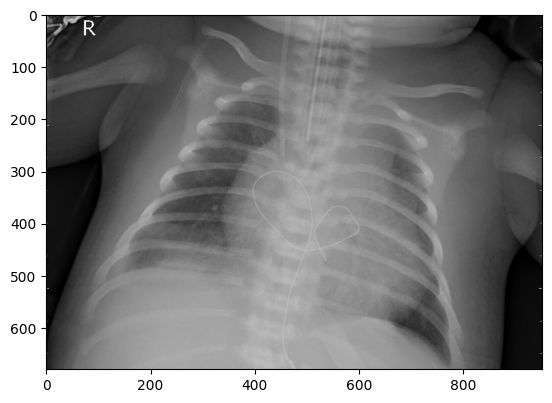

In [58]:
print(f'Actual Diagnosis: {xray[1]}')
predict(xray[0])
